In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pickle
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import metrics

In [17]:
dataset = pd.read_csv('F:\python\python_resume_project\diabetes_prediction_deployment\diabetes.csv')

In [18]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Selection of best features

In [20]:
x = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
bestfeatures = SelectKBest(score_func=f_classif, k=4)
fit = bestfeatures.fit(x,y)

In [21]:
# summarize scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)

In [22]:
#concat two dataframes for better visuallization
featurescores = pd.concat([dfcolumns,dfscores],axis = 1)
featurescores.columns = ['Specs','Scores']
featurescores


,Specs,Scores
0,Pregnancies,39.670227
1,Glucose,213.161752
2,BloodPressure,3.256950
3,SkinThickness,4.304381
4,Insulin,13.281108
5,BMI,71.772072
6,DiabetesPedigreeFunction,23.871300
7,Age,46.140611
8,Outcome,NaN


In [23]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [24]:
dataset.drop('SkinThickness', axis=1, inplace=True)
dataset.drop('BloodPressure', axis=1, inplace=True)

In [25]:
dataset.head(5)

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

<AxesSubplot:>

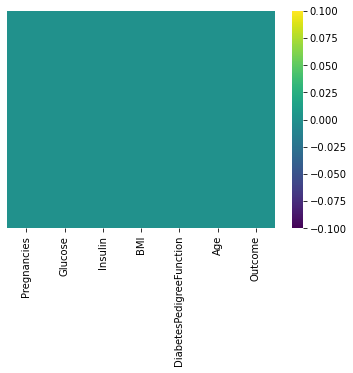

In [26]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

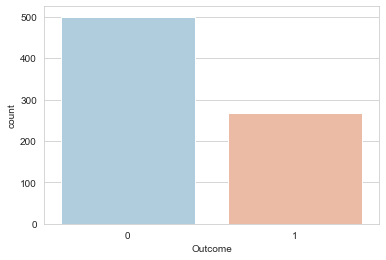

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=dataset,palette='RdBu_r')

Our data is ready for model

Building Model

Train Test Split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Outcome',axis=1), 
                                                    dataset['Outcome'], test_size=0.10, 
                                                    random_state=767)

In [91]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [92]:
predictions = logmodel.predict(X_test)
print("Accuracy:",(metrics.accuracy_score(y_test, predictions)*100))

Accuracy: 87.01298701298701


In [93]:
y_pred = logmodel.predict(X_test)

In [99]:
768*.1

76.80000000000001

In [100]:
print(confusion_matrix(y_test,y_pred))

[[54  3]
 [ 7 13]]


In [101]:
((54+13)/76.80)*100

87.23958333333334

In [102]:
# open a file, where you ant to store the data
file = open('diabetes_logmodel.pkl', 'wb')

# dump information to that file
pickle.dump(logmodel, file)